## Implementing Vanilla Neural Networks using PyTorch

### 0. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
torch.set_default_dtype(torch.float64)

from tqdm import trange
import sys
sys.path.append('../')

from nn_pytorch import NeuralNet

### 1. Reading the Data

In [2]:
def read_data(filename):
    with open(filename, 'rb') as f:
        f.read(8)
        if 'image' in filename:
            f.read(8)
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8)

In [3]:
train_files = {
    'images': 'data/train_images',
    'labels': 'data/train_labels'
}
test_files = {
    'images': 'data/test_images',
    'labels': 'data/test_labels'
}

train_sz = 60000
test_sz = 10000

X_train = read_data(train_files['images']).reshape(train_sz, -1)
y_train = read_data(train_files['labels'])

X_test = read_data(test_files['images']).reshape(test_sz, -1)
y_test = read_data(test_files['labels'])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
# Normalize data
m = X_train.mean()
s = X_train.std()

X_train = (X_train-m)/s
X_test = (X_test-m)/s

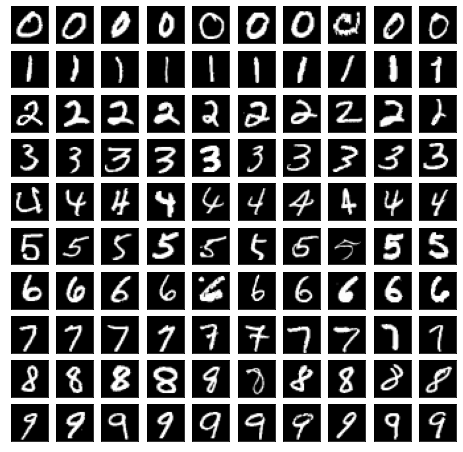

In [5]:
# Plot sample data

num_classes = 10
sample_sz = 10
w, h = 28, 28

fig, ax = plt.subplots(num_classes, sample_sz, figsize=(8, 8))

for i in range(num_classes):
    target, = (y_train==i).nonzero()
    sample = X_train[np.random.choice(target, sample_sz)]
    for j in range(sample_sz):
        ax[i][j].imshow(sample[j].reshape(w, h), cmap='gray')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

### 2. Running the Model

In [6]:
input_dim = w*h
hidden_dim = 128
output_dim = num_classes

model = NeuralNet(input_dim, hidden_dim, output_dim)

In [7]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [8]:
# Training the model

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-3)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, threshold=1e-6)

epochs = 5000
batch_sz = 256

loss_history = []
with trange(epochs) as t:
    no_improve = 0
    for i in range(epochs):
        t.set_description('Running Step #{}'.format(i+1))
        
        # Sample batch
        batch_indices = torch.randperm(train_sz)[:batch_sz]
        X_batch, y_batch = X_train[batch_indices], y_train[batch_indices]
        
        # Forward pass
        y_pred = model(X_batch)
        
        # Compute & back propagate loss
        loss = loss_fn(y_pred, y_batch.long())
        loss_history.append(loss)
        optimizer.zero_grad()
        loss.backward()
        
        # Update weights
        optimizer.step()
        t.update()

Running Step #5000: 100%|██████████| 5000/5000 [00:43<00:00, 113.97it/s]


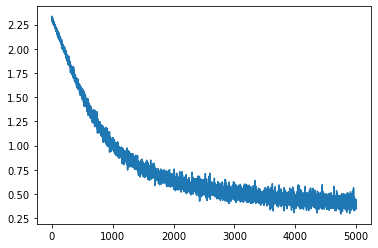

In [9]:
plt.plot(loss_history)
plt.show()

In [10]:
preds = model(X_test)

In [11]:
acc = (preds.argmax(axis=1)==y_test).float().mean().item()
print('Accuracy : {:.4f}%'.format(acc*100))

Accuracy : 89.8000%
